# Preprocessing Data
by [David Ohm](http://ohmdsp.github.io/)
/ [GitHub](https://github.com/ohmdsp)

This notebook looks at steps for preprocessing image data prior to using the data for deep learning.

## Deep Learning
Deep Learning requires data examples of the thing we are trying to learn. It is not uncommon to spend most of your time finding the right data for a network to learn, getting it from various sources, making sure it all looks right and is labeled.

## Scope of Learning

With Deep Learning, you will need a dataset to train the algorithm about the world.  It will learn what is in the dataset.

That's not to say that a network is incapable of transfering what it has learned from the dataset to learn new representations. For instance, a network that has been trained to learn about birds, probably knows a good bit about trees, branches, etc., depending on the dataset.  But, in general, we are limited to learning what our dataset provides.


# Preprocessing Data

In this section, we're going to learn a bit about working with an image based dataset.  We'll see how image dimensions are formatted as a single image and how they're represented as a collection using a 4-d array.  We'll then look at how we can perform dataset normalization.  If you're comfortable with all of this, please feel free to skip to the next video.

We're first going to load some libraries that we'll be making use of.

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')

Again, let's use the CelebFaces images dataset.

In [2]:
from utils import basic_utils
# utils.<tab>
files = basic_utils.get_celeb_files()

In [3]:
img = plt.imread(files[60])
print(img)

[[[253 211 163]
  [253 211 163]
  [253 211 163]
  ...
  [249 193 144]
  [248 192 145]
  [248 192 145]]

 [[253 211 163]
  [253 211 163]
  [253 211 163]
  ...
  [249 193 144]
  [248 192 145]
  [248 192 145]]

 [[253 211 163]
  [253 211 163]
  [253 211 163]
  ...
  [249 193 144]
  [248 192 145]
  [248 192 145]]

 ...

 [[ 69  65  66]
  [ 68  64  65]
  [ 67  63  64]
  ...
  [ 41  38  31]
  [ 42  40  45]
  [ 36  34  39]]

 [[ 62  60  63]
  [ 62  60  65]
  [ 61  59  64]
  ...
  [ 33  32  27]
  [ 38  33  37]
  [ 39  34  38]]

 [[ 62  60  65]
  [ 62  60  65]
  [ 61  58  65]
  ...
  [ 32  33  27]
  [ 41  32  35]
  [ 42  33  36]]]


In [4]:
img.shape

(218, 178, 3)

In [5]:
img

array([[[253, 211, 163],
        [253, 211, 163],
        [253, 211, 163],
        ...,
        [249, 193, 144],
        [248, 192, 145],
        [248, 192, 145]],

       [[253, 211, 163],
        [253, 211, 163],
        [253, 211, 163],
        ...,
        [249, 193, 144],
        [248, 192, 145],
        [248, 192, 145]],

       [[253, 211, 163],
        [253, 211, 163],
        [253, 211, 163],
        ...,
        [249, 193, 144],
        [248, 192, 145],
        [248, 192, 145]],

       ...,

       [[ 69,  65,  66],
        [ 68,  64,  65],
        [ 67,  63,  64],
        ...,
        [ 41,  38,  31],
        [ 42,  40,  45],
        [ 36,  34,  39]],

       [[ 62,  60,  63],
        [ 62,  60,  65],
        [ 61,  59,  64],
        ...,
        [ 33,  32,  27],
        [ 38,  33,  37],
        [ 39,  34,  38]],

       [[ 62,  60,  65],
        [ 62,  60,  65],
        [ 61,  58,  65],
        ...,
        [ 32,  33,  27],
        [ 41,  32,  35],
        [ 42,  33,  36]]

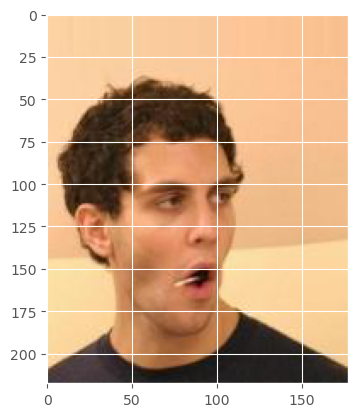

In [6]:
plt.imshow(img)

In [7]:
img.shape

(218, 178, 3)

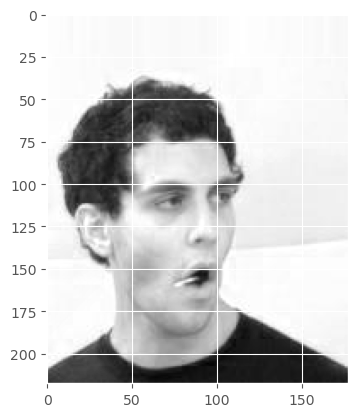

In [8]:
plt.imshow(img[:, :, 0], cmap='gray')

Let's use another helper function which will load every image file in the celeb dataset rather than just give us the filenames like before.  By default, this will just return the first 100 images because loading the entire dataset is a bit cumbersome.  In one of the later sessions, I'll show you how tensorflow can handle loading images using a pipeline so we can load this same dataset.  For now, let's stick with this:

In [9]:
imgs = basic_utils.get_celeb_imgs()

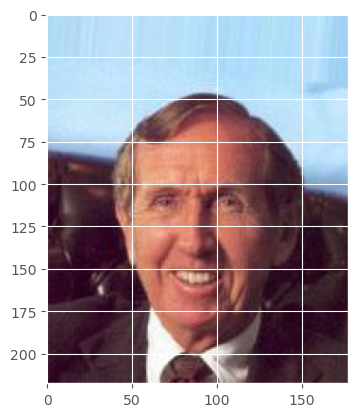

In [10]:
plt.imshow(imgs[20])

In [11]:
imgs[0].shape

(218, 178, 3)

We can combine all of our images to have these 4 dimensions by telling numpy to give us an array of all the images.

This will only work if every image in our list is exactly the same size.  So if you have a wide image, short image, long image, forget about it.  You'll need them all to be the same size. See the previous tutorial on making them the same size.

In [12]:
data = np.array(imgs)
data.shape

(100, 218, 178, 3)

## Mean/Deviation of Images

Now that we have our data in a single numpy variable, we can do alot of cool stuff.  Let's look at the mean of the batch channel:

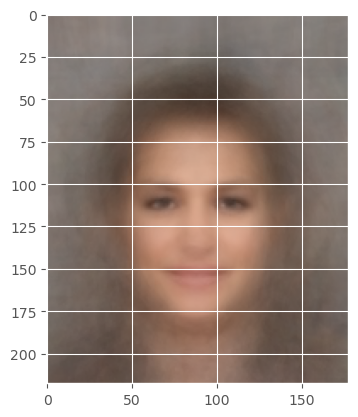

In [13]:
mean_img = np.mean(data, axis=0)
plt.imshow(mean_img.astype(np.uint8))

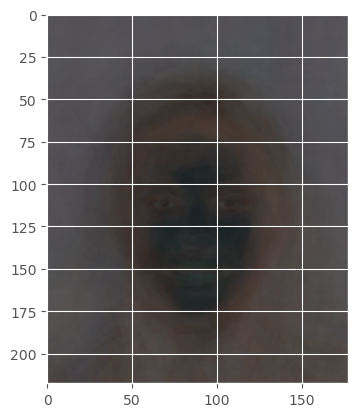

In [14]:
std_img = np.std(data, axis=0)
plt.imshow(std_img.astype(np.uint8))

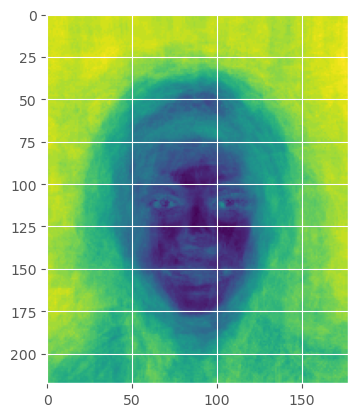

In [15]:
# We can try to look at the average variance over all color channels by taking their mean:
plt.imshow(np.mean(std_img, axis=2).astype(np.uint8))

This is showing us on average, how every color channel will vary as a heatmap.  The more red, the more likely that our mean image is not the best representation.  The more blue, the less likely that our mean image is far off from any other possible image.

## Dataset Preprocessing

Whatare we trying to accomplish when we build a deep learning model?  We're trying to build a model that understands invariances.  We need our model to be able to express *all* of the things that can possibly change in our data.  Well, this is the first step in understanding what can change.  If we are looking to use deep learning to learn something complex about our data, it will often start by modeling both the mean and standard deviation of our dataset.  We can help speed things up by "preprocessing" our dataset by removing the mean and standard deviation.  What does this mean?  Subtracting the mean, and dividing by the standard deviation.  Another word for that is "normalization".

## Histograms

Let's look at our dataset another way.  We're first going to convert our `batch` x `height` x `width` x `channels` array into a 1 dimensional array.  Instead of having 4 dimensions, we'll now just have 1 dimension of every pixel value stretched out in a long vector, or 1 dimensional array.

In [16]:
flattened = data.ravel()

We first convert our N x H x W x C dimensional array into a 1 dimensional array.  The values of this array will be based on the last dimensions order.  So we'll have: [<font color='red'>251</font>, <font color='green'>238</font>, <font color='blue'>205</font>, <font color='red'>251</font>, <font color='green'>238</font>, <font color='blue'>206</font>, <font color='red'>253</font>, <font color='green'>240</font>, <font color='blue'>207</font>, ...]

We can visualize what the "distribution", or range and frequency of possible values are.  This is a very useful thing to know.  It tells us whether our data is predictable or not.

(array([216804., 117821.,  99125.,  71049.,  66478.,  62066.,  62528.,
         58085.,  56686.,  56114.,  56848.,  58551.,  63168.,  61086.,
         59193.,  59305.,  62526.,  63596.,  62285.,  65061.,  63389.,
         61989.,  61411.,  60742.,  60464.,  60307.,  59074.,  59312.,
         60353.,  64807.,  67305.,  61667.,  59906.,  60546.,  62017.,
         62268.,  63030.,  62799.,  62396.,  62609.,  59541.,  58918.,
         57822.,  61451.,  63481.,  57782.,  57212.,  56516.,  56039.,
         58385.,  56252.,  55089.,  54677.,  52066.,  51012.,  48826.,
         47602.,  46064.,  45351.,  43735.,  42849.,  42903.,  42571.,
         41789.,  42412.,  42705.,  42982.,  43107.,  43372.,  43416.,
         43323.,  42808.,  42253.,  42302.,  42008.,  41846.,  42800.,
         42476.,  42435.,  42405.,  42584.,  42612.,  42671.,  42344.,
         42610.,  42023.,  42214.,  41700.,  41302.,  41160.,  41885.,
         42650.,  41703.,  42498.,  41983.,  42702.,  42735.,  43540.,
      

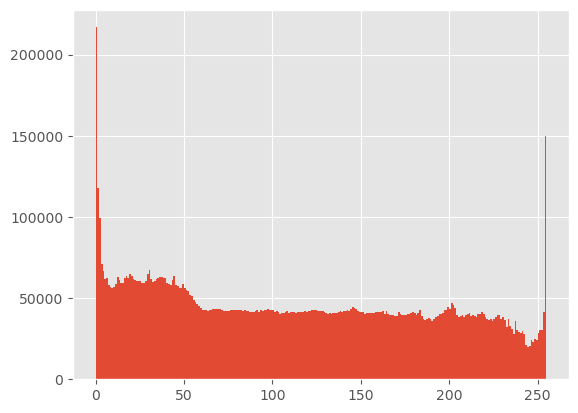

In [17]:
plt.hist(flattened.ravel(), 255)

This provides a histogram of every value in the vector, and uses 255 bins.  Each bin is grouping of a range of values.  The bars of each bin describe how many times a value within the range of values appears. In other words, it is telling us the frequency a value occurs.

## Histogram Equalization

The mean of our dataset looks like this:

(array([   2.,    0.,    0.,    0.,    2.,   18.,   30.,   23.,   42.,
          42.,   43.,   41.,   51.,   48.,   30.,   52.,   58.,   59.,
          67.,   67.,   71.,   83.,   94.,  110.,  110.,  107.,  134.,
         103.,  109.,  160.,  198.,  206.,  211.,  265.,  306.,  289.,
         344.,  335.,  361.,  382.,  402.,  390.,  400.,  497.,  544.,
         594.,  663.,  679.,  749.,  803.,  847.,  882.,  886.,  938.,
         817.,  857.,  801.,  825.,  831.,  896.,  875.,  861.,  843.,
         870.,  842.,  897.,  863.,  861.,  906.,  939.,  905.,  935.,
         946.,  972., 1004., 1064., 1079., 1124., 1162., 1103., 1129.,
        1108., 1085., 1079., 1051., 1155., 1068., 1093., 1170., 1171.,
        1146., 1213., 1146., 1174., 1211., 1229., 1173., 1196., 1216.,
        1150., 1255., 1373., 1344., 1445., 1554., 1554., 1553., 1478.,
        1506., 1469., 1546., 1626., 1659., 1568., 1548., 1559., 1576.,
        1376., 1283., 1189., 1151., 1093., 1046., 1068., 1021., 1059.,
      

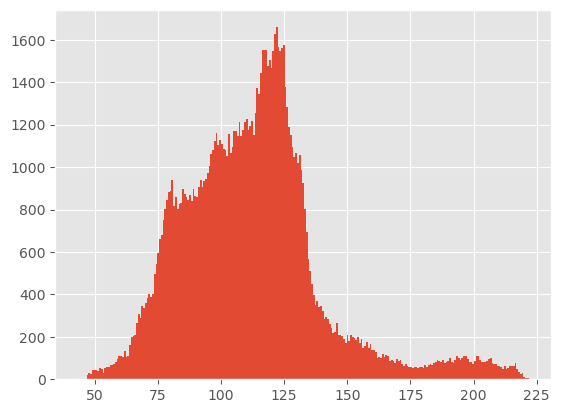

In [18]:
plt.hist(mean_img.ravel(), 255)

When we subtract an image by our mean image, we remove all of this information from it. Let's try and compare the histogram before and after "normalizing our data".

Text(0.5, 1.0, '(img - mean) distribution')

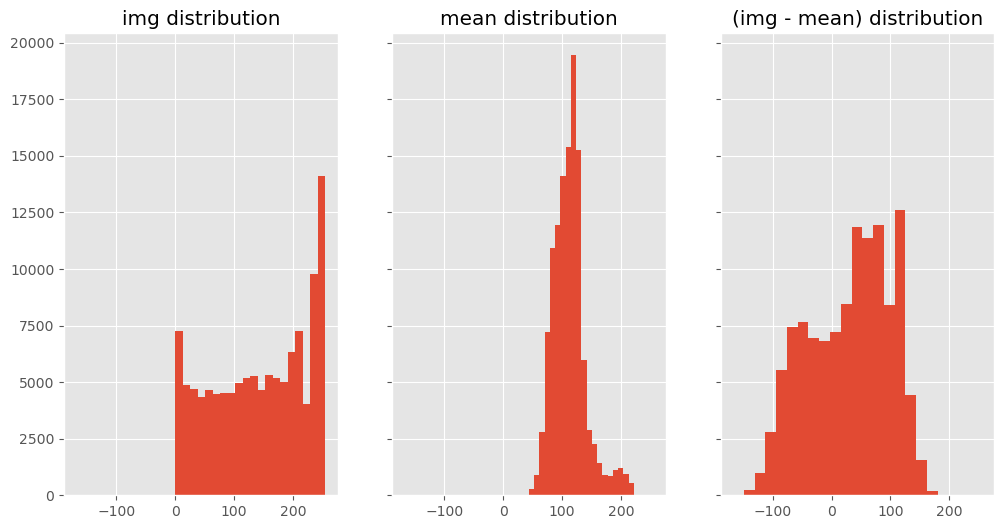

In [19]:
bins = 20
fig, axs = plt.subplots(1, 3, figsize=(12, 6), sharey=True, sharex=True)
axs[0].hist((data[0]).ravel(), bins)
axs[0].set_title('img distribution')
axs[1].hist((mean_img).ravel(), bins)
axs[1].set_title('mean distribution')
axs[2].hist((data[0] - mean_img).ravel(), bins)
axs[2].set_title('(img - mean) distribution')

Let's take it one step further and complete the normalization by dividing by the standard deviation of our dataset.

Text(0.5, 1.0, '((img - mean) / std_dev) distribution')

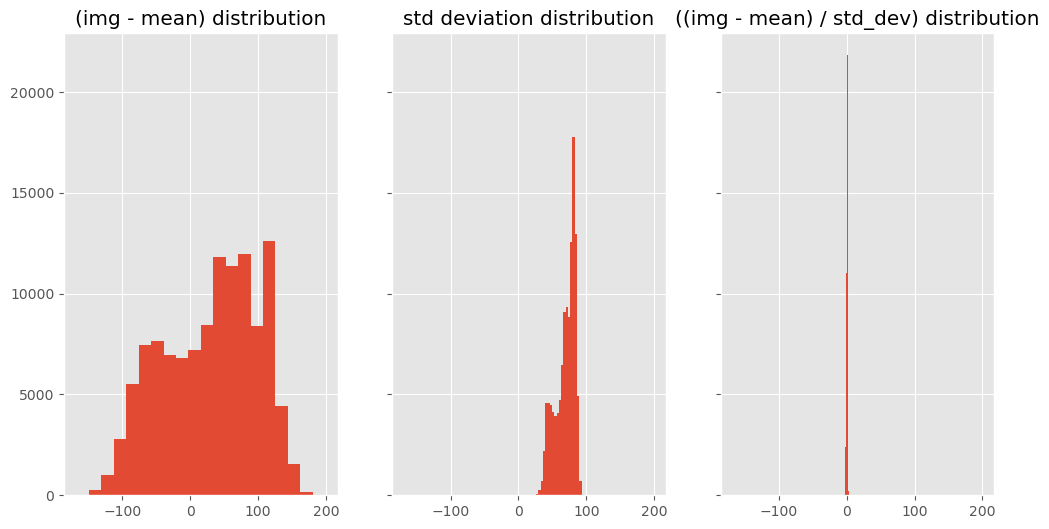

In [20]:
fig, axs = plt.subplots(1, 3, figsize=(12, 6), sharey=True, sharex=True)
axs[0].hist((data[0] - mean_img).ravel(), bins)
axs[0].set_title('(img - mean) distribution')
axs[1].hist((std_img).ravel(), bins)
axs[1].set_title('std deviation distribution')
axs[2].hist(((data[0] - mean_img) / std_img).ravel(), bins)
axs[2].set_title('((img - mean) / std_dev) distribution')
#axs[2].set_xlim([-10, 10])

Now our data has been squished into a peak!  We'll have to look at it on a different scale to see what's going on.

(-5.0, 5.0)

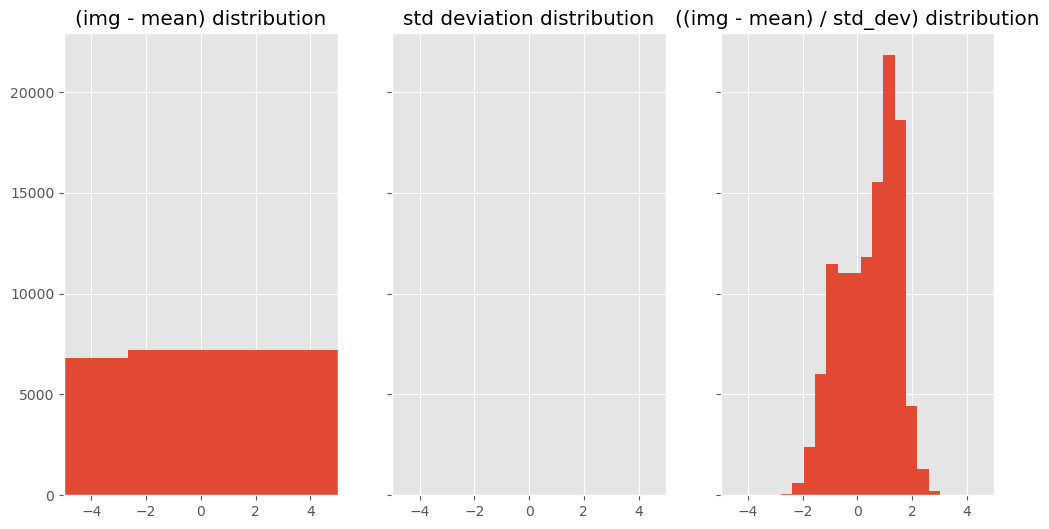

In [21]:
fig, axs = plt.subplots(1, 3, figsize=(12, 6), sharey=True, sharex=True)
axs[0].hist((data[0] - mean_img).ravel(), bins)
axs[0].set_title('(img - mean) distribution')
axs[1].hist((std_img).ravel(), bins)
axs[1].set_title('std deviation distribution')
axs[2].hist(((data[0] - mean_img) / std_img).ravel(), bins)
axs[2].set_title('((img - mean) / std_dev) distribution')
axs[2].set_xlim([-5, 5])

We see that the data is in the range of -3 to 3, with the bulk of the data centered around -1 to 1.  This is the effect of normalizing our data: most of the data will be around 0, where some deviations of it will follow between -3 to 3.

If our data does not end up looking like this after normalization, then we should either (1): get much more data to calculate our mean/std deviation, or (2): try another method of normalization, such as scaling the values between 0 to 1, or -1 to 1, or possibly not bother with normalization at all.  There are other options that one could explore, including different types of normalization such as local contrast normalization for images or PCA based normalization.

## Other Preprocessing

Let's create a Gaussian curve.  This should resemble a normalized histogram where most of the data is centered around the mean of 0. 

In [22]:
#import tensorflow
#import tensorflow as tf

In [23]:
x = np.linspace(-3.0, 3.0, 100)

In [24]:
# The 1 dimensional gaussian takes two parameters, the mean value, and the standard deviation, which is commonly denoted by the name sigma.
mean = 0.0
sigma = 1.0

# Don't worry about trying to learn or remember this formula.  I always have to refer to textbooks or check online for the exact formula.
z = (np.exp(np.negative(np.power(x - mean, 2.0) /
                   (2.0 * np.power(sigma, 2.0)))) *
     (1.0 / (sigma * np.sqrt(2.0 * 3.1415))))

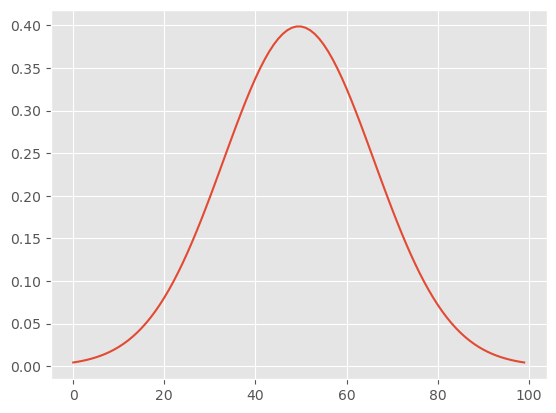

In [25]:
plt.plot(z)

# Convolution

## Creating a 2-D Gaussian Kernel

Let's create a 2-dimensional Gaussian.  This can be done by multiplying a vector by its transpose.  If you aren't familiar with matrix math, I'll review a few important concepts.  This is about 98% of what neural networks do so if you're unfamiliar with it, pay attention.  First, to multiply two matrices, their inner dimensions must agree, and the resulting matrix will have the shape of the outer dimensions.

So let's say we have two matrices, X and Y.  In order for us to multiply them, X's columns must match Y's rows:
<pre>
    (X_rows, X_cols) x (Y_rows, Y_cols)
      |       |           |      |
      |       |___________|      |
      |             ^            |
      |     inner dimensions     |
      |        must match        |
      |                          |
      |__________________________|
                    ^
           resulting dimensions
         of matrix multiplication
</pre>
But our matrix is actually a vector, or a 1 dimensional matrix.  That means its dimensions are N x 1.  So to multiply them, we'd have:
<pre>
     (N,      1)    x    (1,     N)
      |       |           |      |
      |       |___________|      |
      |             ^            |
      |     inner dimensions     |
      |        must match        |
      |                          |
      |__________________________|
                    ^
           resulting dimensions
         of matrix multiplication
</pre>

In [26]:
def gaussian_filter(kernel_size, sigma=1, muu=0):
 
    # Initializing value of x,y as grid of kernel size
    # in the range of kernel size
 
    x, y = np.meshgrid(np.linspace(-3, 3, kernel_size),
                       np.linspace(-3, 3, kernel_size))
    dst = np.sqrt(x**2+y**2)
 
    # lower normal part of gaussian
    normal = 1/(2.0 * np.pi * sigma**2)
 
    # Calculating Gaussian filter
    gauss = np.exp(-((dst-muu)**2 / (2.0 * sigma**2))) * normal
    
    return (gauss)
 

In [27]:
kernel_size = 10
z_2d = gaussian_filter(kernel_size)

In [28]:
print(z_2d)

[[1.96412803e-05 1.16211438e-04 4.40867600e-04 1.07237757e-03
  1.67250526e-03 1.67250526e-03 1.07237757e-03 4.40867600e-04
  1.16211438e-04 1.96412803e-05]
 [1.16211438e-04 6.87587468e-04 2.60847850e-03 6.34492950e-03
  9.89570114e-03 9.89570114e-03 6.34492950e-03 2.60847850e-03
  6.87587468e-04 1.16211438e-04]
 [4.40867600e-04 2.60847850e-03 9.89570114e-03 2.40705553e-02
  3.75410037e-02 3.75410037e-02 2.40705553e-02 9.89570114e-03
  2.60847850e-03 4.40867600e-04]
 [1.07237757e-03 6.34492950e-03 2.40705553e-02 5.85498315e-02
  9.13156930e-02 9.13156930e-02 5.85498315e-02 2.40705553e-02
  6.34492950e-03 1.07237757e-03]
 [1.67250526e-03 9.89570114e-03 3.75410037e-02 9.13156930e-02
  1.42418101e-01 1.42418101e-01 9.13156930e-02 3.75410037e-02
  9.89570114e-03 1.67250526e-03]
 [1.67250526e-03 9.89570114e-03 3.75410037e-02 9.13156930e-02
  1.42418101e-01 1.42418101e-01 9.13156930e-02 3.75410037e-02
  9.89570114e-03 1.67250526e-03]
 [1.07237757e-03 6.34492950e-03 2.40705553e-02 5.85498315e

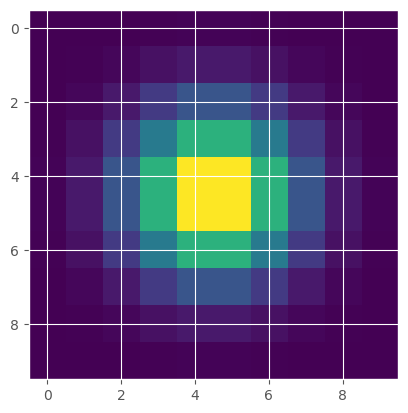

In [29]:
plt.imshow(z_2d)

## Convolving an Image with a Gaussian

Convolution is a very common operation that in Deep Learning.  We will explore this using the gaussian kernel just created.  For now, just think of it as a way of filtering an image.  We're going to filter our image using the Gaussian function.  It will average the image values around a defined region based on the kernel values.  The Gaussian's kernel is basically taking a pixels around a center pixel and attenuating the values as as you move away from the center.  The effect of convolving the image with this type of kernel is that the entire image will be blurred.  If you would like an interactive exploratin of convolution, this website is great:

http://setosa.io/ev/image-kernels/

(218, 178)


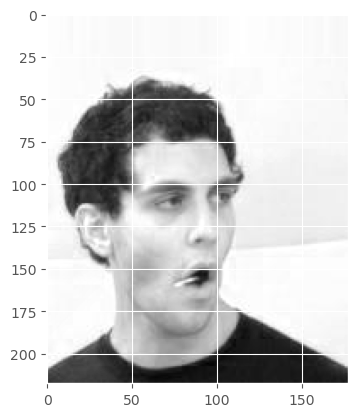

In [30]:
# Let's first load an image.  We're going to need a grayscale image to begin with.  skimage has some images we can play with.  If you do not have the skimage module, you can load your own image, or get skimage by pip installing "scikit-image".

img = img[:, :, 0].astype(np.float32)
plt.imshow(img, cmap='gray')
print(img.shape)

## Convolve/Filter an image using a Gaussian Kernel

We can now use our previous Gaussian Kernel to convolve our image (we will use open CV):

(218, 178)


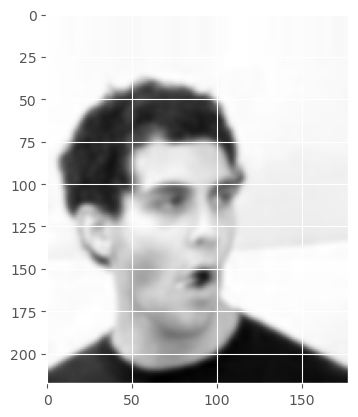

In [31]:
import cv2 

img_filtered = cv2.filter2D(src=img,ddepth=-1,kernel = z_2d)
plt.imshow(img_filtered, cmap='gray')
print(img.shape)